# **Understanding the Arts Classification Scheme in Singapore**




## **Section 1: Business Understanding**

##### **Question 1**:   What is the number of Art Performance/Event send for classification in each year? 

##### **Question 2**  What is the main activities for the year 2018 - 2020?

##### **Question 3** Which month in the year with the most performance?

##### **Question 4** What is the general classification rating? Is there a correlation between langauge used and the classification

##### **Question 5** Which is the company with the most production over the years? And which company held the most number of mature performance?

#### **Import Libraries**'

##### To get started, we will first need to get import some libraries

In [18]:
import requests # HTTP requests (GET / POST)

## to handle zip file
import zipfile

## to handle dataframe manipulation and graphing
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Image

## To handle later stage Just for fun section
from collections import Counter
from wordcloud import WordCloud

## **Section 2: Data Understanding**

#### We will then go to download the neccessary data from [data.gov.sg](https://https://data.gov.sg/dataset/3f3c00aa-aefc-4a40-a6e6-984ddd132fa9/download)

In [19]:
# generic download function from requests
def download_url(url, save_path, chunk_size=128):
    """ 
    Download the resources specified in the URL.

    Parameters:
        url (str)        : The string which defines the url to download
        save_path (str)  : The location in which the resources after download will save to
        chunk_size (int) : The size of the data chunk to download at one time

    Returns:
        None.
    """

    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [20]:
# getting the database using the below URL
url = 'https://data.gov.sg/dataset/3f3c00aa-aefc-4a40-a6e6-984ddd132fa9/download'
r = 'arts.zip'

# download the file
download_url(url,r)

In [21]:
# looking into the zipfile
archive = zipfile.ZipFile('arts.zip', 'r')
csv = archive.open('arts-entertainment-classification-database-2018-to-2020.csv')

# read the csv file into pandas
art_df = pd.read_csv(csv, encoding= 'unicode_escape')

## **Section 3: Data Preparation**

#### No DType warning is a good sign. It mean that all the data is properly typed

#### Let us have a look at the overall raw dataset

In [22]:
## Overview of dataset
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    1745 non-null   int64 
 1   title                   1745 non-null   object
 2   company_name            1745 non-null   object
 3   language                1745 non-null   object
 4   event_type              1745 non-null   object
 5   performance_start_date  1745 non-null   object
 6   performance_end_date    1745 non-null   object
 7   venue_block_number      1745 non-null   object
 8   venue_street_name       1745 non-null   object
 9   venue_floor_number      1744 non-null   object
 10  venue_unit_number       1743 non-null   object
 11  venue_building_name     1745 non-null   object
 12  synopsis                1745 non-null   object
 13  rating_decision         1745 non-null   object
 14  consumer_advice         1745 non-null   object
dtypes: i

### **Preprocessing**

#### We have gotten our data successfully from the data.gov.sg and we should check whether there is any null data with the database or anything that is out of place

In [23]:
# check for missing records and print them out
for i in art_df.columns:
    if art_df[i].isna().sum() != 0:
        print("column {} has {} missing records ".format(i, art_df[i].isna().sum()))

column venue_floor_number has 1 missing records 
column venue_unit_number has 2 missing records 


#### Venue Floor number and unit number has some missing data, only one to two missing data. So we make a conscious decision not to drop them as the number is few and should not matter in analysis

## **Section 4: Evaluate the Results**

##### **Question 1: What is the number of Art Performance/Event send for classification in each year?**

##### We shall explore general statistic of the dataset and get the number of applications per year and in turn get the year on year change




   year  title  company_name  ...  synopsis  rating_decision  consumer_advice
0  2018    769           769  ...       769              769              769
1  2019    796           796  ...       796              796              796
2  2020    180           180  ...       180              180              180

[3 rows x 15 columns]
The growth between 2019 and 2018 is 3.5110533159947983 

The growth between 2020 and 2019 is -77.38693467336684 



Text(0.5, 1.0, '% changes for Year on Year Event Number from 2018-2020')

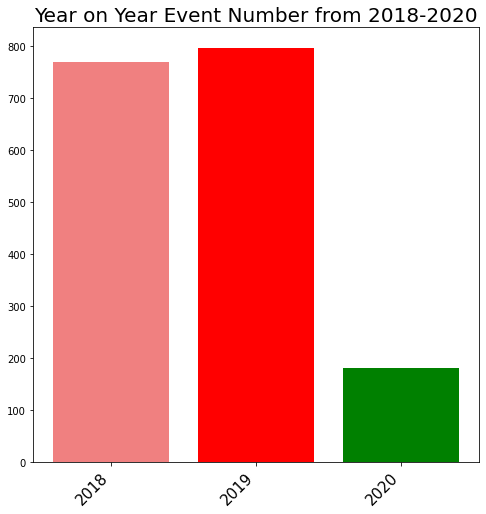

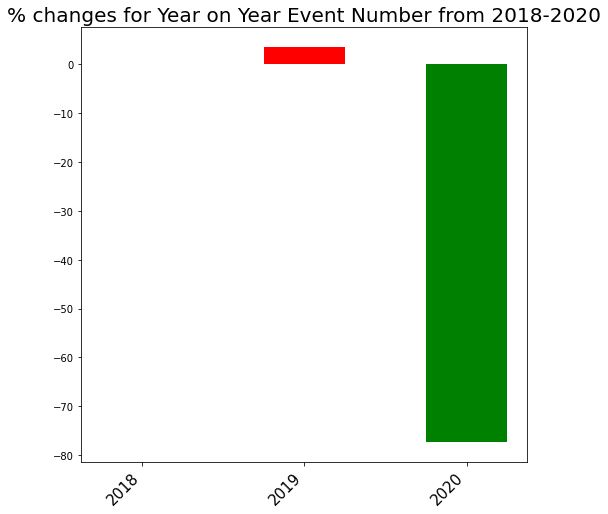

In [24]:
# we will group the activities by the year they occur
art_df_year = art_df.groupby(['year'], as_index=False).count()
print(art_df_year)

# print the number of activities in 2018, 2019 and 2020 in bar chart
bar_colors = ['lightcoral', 'red', 'green']
plt.figure(figsize=(8,8))
plt.bar(art_df_year.year, art_df_year['event_type'],color=bar_colors, width = 0.8)
plt.xticks(ticks = [2018, 2019,2020], rotation=45, ha="right", fontsize =15)
plt.title("Year on Year Event Number from 2018-2020", fontsize =20)

# # year on year increaase from 2018  to 2019
art_df_2018 = art_df.loc[art_df.year == 2018, 'year'].count()
art_df_2019 = art_df.loc[art_df.year == 2019, 'year'].count()
art_df_2020 = art_df.loc[art_df.year == 2020, 'year'].count()

## calculating the increment percentage
inc_18    = 0 
inc_19_18 = ( art_df_2019 - art_df_2018 ) /  art_df_2018 * 100.0
print(f"The growth between 2019 and 2018 is {inc_19_18} \n")
inc_20_19 = ( art_df_2020 - art_df_2019 ) / art_df_2019  * 100.0
print(f"The growth between 2020 and 2019 is {inc_20_19} \n")

## create the bar plot for the % increment
bar_colors = ['lightcoral', 'red', 'green']
plt.figure(figsize=(8,8))
plt.bar(art_df_year.year.values, [inc_18, inc_19_18, inc_20_19 ],color=bar_colors, width = 0.5)
plt.xticks(ticks = [2018, 2019,2020], rotation=45, ha="right", fontsize =15)
plt.title("% changes for Year on Year Event Number from 2018-2020", fontsize =20)


##### We can see that the number of applications grew by a modest 3.5% from 2018 to 2019. However there is a sharp decrement of almost 80% for the year going into 2020

##### **Question 2  What is the main activities for the year 2018 - 2020?**

##### We want to investigate on which is the preferred or dominant art entertainment activitiy in Singapore. From here we want to get the top 3 most preferred activities

In [25]:
## helper function for this section
def top_three(year):
  """ 
  To get and print out the top 3 activities for the year given

  Parameters:
      year (float)        : The year specified

  Returns:
      None. Print out the top 3 activities for the year
  """
  
  x = (art_df['event_type'].loc[art_df.year==year].value_counts()).sort_values(ascending=False).index
  print(f'The top 3 major activities in the year {str(year)} is ' )
  print(*(x.to_list()[0:3]), sep=', ')


In [26]:
# the top 3 activities
## The top 3 for Year 2018, 2019, 2020
years = [2018, 2019, 2020]

## iterate item in the list 
for y in years:
  top_three(y)


The top 3 major activities in the year 2018 is 
Pop/Rock Concert, Play, Dance
The top 3 major activities in the year 2019 is 
Pop/Rock Concert, Play, Dance
The top 3 major activities in the year 2020 is 
Play, Pop/Rock Concert, Exhibition


##### From above we can see top 3 major activities for the each year

*   Year 2018  --- Pop Rock, Play and Dance
*   Year 2019  --- Pop Rock, Play and Dance
*   Year 2020  --- Play, Pop Rock And Exhibition 
 

##### We can discover more of the distribution of activities by looking at the pie chart. Down here we combined activities other than Pop/Rock Concert, Play, Dance and Exhibition to be Others. This is done to give a better presentation for pie chart diagram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Art/Entertainment Event in 2020')

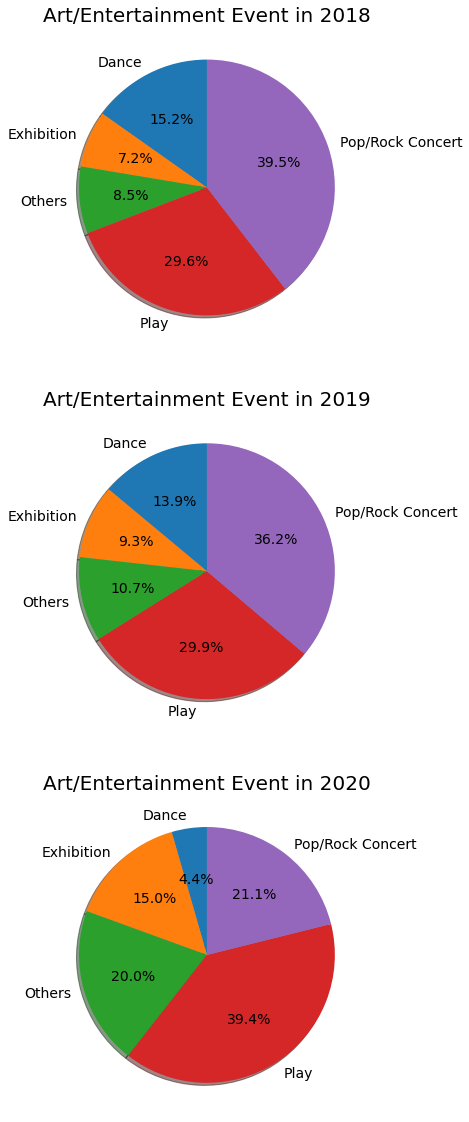

In [27]:
## combining the to form the other art disciplinary
art_df_copy = art_df.copy()
art_df_copy.event_type[art_df_copy.event_type.isin(['MULTI-DISCIPLINARY ART','OTHERS', 'PLAY READING/POETRY READING/RECITAL','Music', 'PUPPET SHOW'])] = "Others"
art_df_yr_event = art_df_copy.groupby(['year','event_type'], as_index=False).count()

## get the individual year database
art_df_2018_event = art_df_yr_event[art_df_yr_event['year']==2018] 
art_df_2019_event = art_df_yr_event[art_df_yr_event['year']==2019]
art_df_2020_event = art_df_yr_event[art_df_yr_event['year']==2020] 

### Now plotting for each of them
# pie plot for year 2018
plt.figure(figsize=(40,20))
fig= plt.subplot(3, 1, 1)
plt.pie(art_df_2018_event['title'], labels=art_df_2018_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2018', fontsize=20)

# pie plot for year 2019
fig= plt.subplot(3, 1, 2)
plt.pie(art_df_2019_event['title'], labels=art_df_2019_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2019', fontsize=20)

# pie plot for year 2020
fig= plt.subplot(3, 1,3)
plt.pie(art_df_2020_event['title'],  labels=art_df_2020_event['event_type'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
plt.title('Art/Entertainment Event in 2020', fontsize=20)



##### **Question 3: Which month in the year with the most performance?**

##### We will look at time period for the performance. For this, we will choose the beginning date of the performance instead of the end data. Hopefully from this, we could find out which month or period in the year has the most performance

In [28]:
## Get each year data
art_df_2020 = art_df.loc[art_df.year == 2020]
art_df_2019 = art_df.loc[art_df.year == 2019]
art_df_2018 = art_df.loc[art_df.year == 2018]


Text(0.5, 1.0, 'Art/Entertainment Event in 2018')

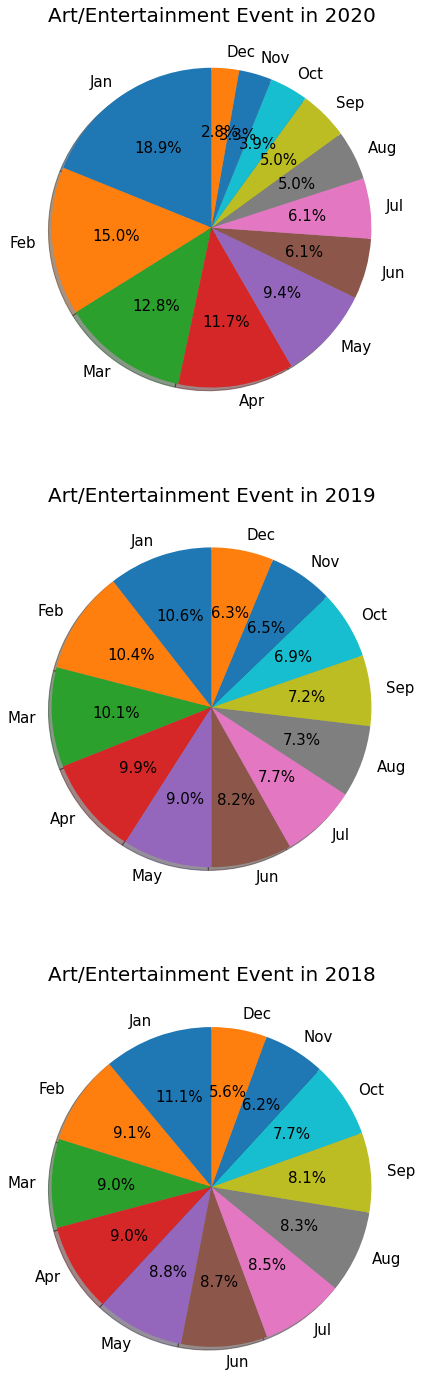

In [29]:
## Get the event numbers for the month in each years
#### the result will be a data series of number of events per month in the year
#### first we start off with conversion of date time
art_df_2020_mth = pd.to_datetime(art_df_2020['performance_start_date'], infer_datetime_format=True) 
art_df_2020_mth['month'] = art_df_2020_mth.dt.month
art_df_2020_mth_dist = art_df_2020_mth['month'].value_counts()

art_df_2019_mth = pd.to_datetime(art_df_2019['performance_start_date'], infer_datetime_format=True) 
art_df_2019_mth['month'] = art_df_2019_mth.dt.month
art_df_2019_mth_dist = art_df_2019_mth['month'].value_counts()

art_df_2018_mth = pd.to_datetime(art_df_2018['performance_start_date'], infer_datetime_format=True) 
art_df_2018_mth['month'] = art_df_2018_mth.dt.month
art_df_2018_mth_dist = art_df_2018_mth['month'].value_counts()

## Plotting the pie chart
### labels for the pie chart
mth_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

### Plotting for the year 2020
plt.figure(figsize=(40,25))
fig= plt.subplot(3, 1, 1)
plt.pie(art_df_2020_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2020', fontsize=20)

### Plotting for the year 2019
fig= plt.subplot(3, 1, 2)
plt.pie(art_df_2019_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2019', fontsize=20)

### Plotting for the year 2018
fig= plt.subplot(3, 1, 3)
plt.pie(art_df_2018_mth_dist, labels=mth_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
plt.title('Art/Entertainment Event in 2018', fontsize=20)

##### **Question 4 What is the general classification rating?**

##### We will now explore the censorship count. First, we will see a distribution of the ratings. Next subsequently we will see if there is a connection between languages and the ratings. Does it mean the ratings is more skewed towards 'Mature' ratings for a particular language 

Text(0, 0.5, 'Percentage of activities')

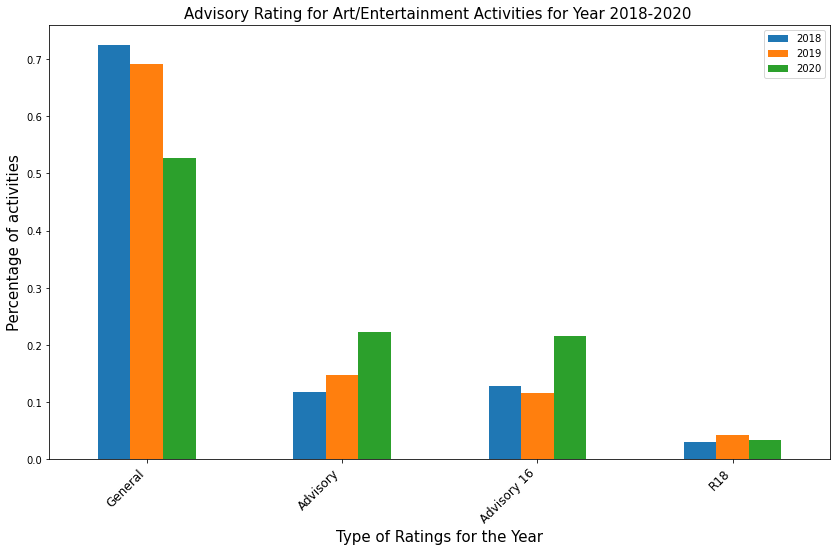

In [30]:
## Censorship
## We will first take a look at the ratings distribution from database
art_df_2020_rating = art_df_2020['rating_decision'].value_counts()
art_df_2019_rating = art_df_2019['rating_decision'].value_counts()
art_df_2018_rating = art_df_2018['rating_decision'].value_counts()

## 
art_df_2020_rating = art_df_2020_rating / art_df_2020_rating.sum()
art_df_2019_rating = art_df_2019_rating / art_df_2019_rating.sum()
art_df_2018_rating = art_df_2018_rating / art_df_2018_rating.sum()

## define the colour of bar chart
bar_colors = ['blue', 'red', 'green']

## define the data to be plotted
plotdata = pd.DataFrame({
    "2018":art_df_2018_rating,
    "2019":art_df_2019_rating,
    "2020":art_df_2020_rating
    }, 
    index= art_df_2020_rating.index
)

## plotting out the data
plotdata.plot(kind="bar", figsize=(14,8))
plt.title("Advisory Rating for Art/Entertainment Activities for Year 2018-2020 ", fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize =12)
plt.xlabel("Type of Ratings for the Year", fontsize=15)
plt.ylabel("Percentage of activities",fontsize=15)

###### We look at classification together with the langauge used and see whether language used made a difference in "Mature" performance

In [31]:
## Helper Functions
## We will declare our helper functions for this Section here
def get_langauge_type(language):
    """ 
    To reclass language column, in this case, either to remain as 4 official 
    language or reclass to OTHERS

    Parameters:
        language (str)        : Return OTHERS if langauge is not in official language

    Returns:
        Either OTHERS or the language in ['ENGLISH', 'CHINESE', 'MALAY', 'TAMIL'] (str)
    """

    if language in ['ENGLISH', 'CHINESE', 'MALAY', 'TAMIL']:
        return language
    else:
        return 'OTHERS'

def get_rating(rating):
    """ 
    To reclass rating column, in this case, the langauge to Mature or remain as
    General

    Parameters:
        rating (str)        : Return Mature if rating is not 'General'

    Returns:
        Either Mature or General (str)
    """

    if rating == "General":
        return rating
    else:
        return 'Mature'

def get_value(l):
    """ 
    To return the value_counts from the column language from either
    language and either rating; purpose is to aid in drawing the bar

    Parameters:
        l (str)           : Reture

    Returns:
        Either Mature or General
    """

    ol = art_df_rating_language['language'][art_df_rating_language.language == l].count()
    ncl = art_df_rating_language['language'][(art_df_rating_language.language == l) & (art_df_rating_language.rating == "General")].count()
    cl = art_df_rating_language['language'][ (art_df_rating_language.language == l) & (art_df_rating_language.rating == "Mature")].count()
    return [ol, ncl, cl]


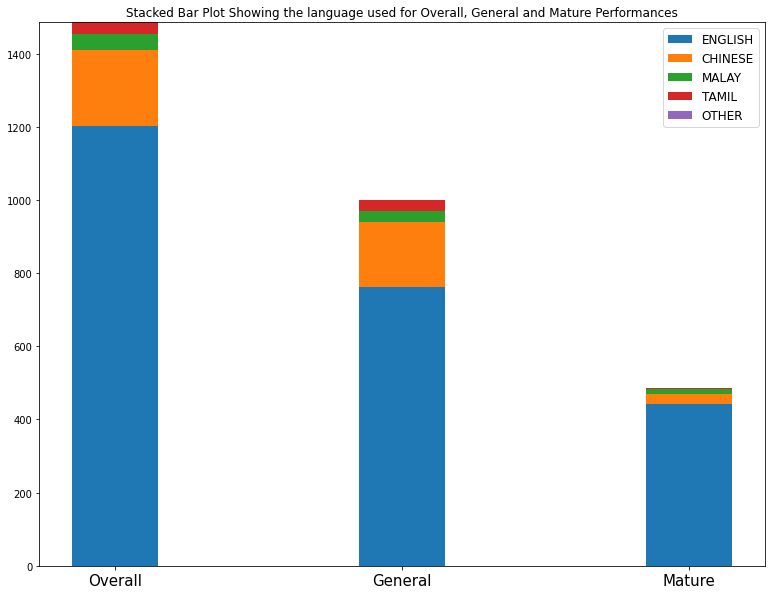

In [32]:
## getting the performances numbers that are general in the 5 languages category
## and the performances number that are considered Mature in the same language category
official_language = ['ENGLISH', 'CHINESE', 'MALAY', 'TAMIL']
unofficial_language = official_language.append('OTHER')
category =['Overall', 'General', 'Mature']

art_df_language = art_df.language.apply(get_langauge_type)
art_df_rating = art_df.rating_decision.apply(get_rating)

art_df_rating_language = pd.DataFrame({'language':art_df_language, 'rating':art_df_rating})

## make a stacked bar plot
plt.figure(figsize=(13,10))

## iterative plot
margin_bottom =[0,0,0]
for language in official_language:
    values = get_value(language)

    plt.bar(category, values, bottom = margin_bottom, width = 0.3)

    out_arr = np.add(np.array(margin_bottom), np.array(values)) 
    margin_bottom = out_arr.tolist()

plt.xticks(ticks = category, ha="center", fontsize =15)
plt.title(" ", fontsize =20)
plt.legend(official_language, fontsize=12)
plt.title("Stacked Bar Plot Showing the language used for Overall, General and Mature Performances")
plt.show()

##### **Question 5 Which is the company with the most production over the years? And which company held the most number of mature performance?**

##### This section is to find the company with the most production and most mature production, in the event of 3 years. 

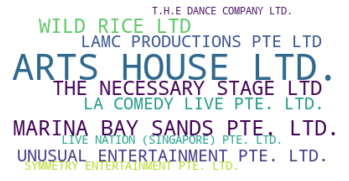

In [33]:
## We will use the company column and create a word cloud ( by filling it up with company name) 
## to show the company with most production (limited to the top 10 companies)
##  
words = art_df['company_name']
word_cloud_lst = Counter(words)
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



##### Arts House is the production house which features the most in performance production

#### This is to find out the company with the most "mature" production


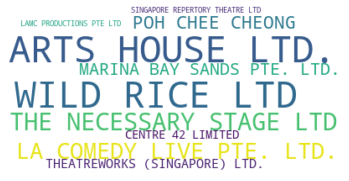

In [34]:
## We will restrict our search to the production that are mature and use the 
## production house name to form the cloud
##  

art_df_mature = art_df[art_df.rating_decision != 'General']

words = art_df_mature['company_name']
word_cloud_lst = Counter(words)
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#####  ArtS House Ltd still seems to lead the most production in this category but Wild Rice Ltd came in a close second